# Aula 4 - Usando dados do Enem
### Estatística e Correlações do Enem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

In [2]:
uri = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,...,A,B,A,A,D,B,B,B,A,A


In [3]:
# Linhas de comando que servem para definir a precisão da notação científica
%precision %.2f
pd.options.display.float_format = "{:,.2f}".format

In [4]:
# lenght = quantidade de colunas
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
       'Q027'],
      dtype='object', length=137)

In [5]:
# Descrevendo os dados das colunas - somente descreve colunas numéricas
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00",...,"97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,...,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,...,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,...,455.60,0.00,1.00,120.00,40.00,40.00,100.00,40.00,360.00,3.00
50%,"180,010,373,993.50","2,018.00","3,137,700.00",31.00,19.00,0.00,2.00,1.00,"3,126,109.00",31.00,...,516.50,1.00,1.00,120.00,120.00,120.00,120.00,60.00,520.00,4.00
75%,"180,012,032,768.50","2,018.00","3,550,308.00",35.00,24.00,0.00,3.00,1.00,"3,550,308.00",35.00,...,600.00,1.00,1.00,140.00,120.00,120.00,140.00,120.00,620.00,5.00
max,"180,014,002,596.00","2,018.00","5,300,108.00",53.00,78.00,3.00,5.00,4.00,"5,300,108.00",53.00,...,989.90,1.00,9.00,200.00,200.00,200.00,200.00,200.00,"1,000.00",20.00


In [6]:
# Colunas de notas
colunas_de_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
dados_notas = dados[colunas_de_notas].dropna() # tirando dados NaN
# Mudando o nome das colunas
dados_notas.columns = ["ciencias_naturais", "ciencias_humanas", "linguagem_codigo", "matematica", "redacao"]
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [7]:
len(dados_notas)

97270

In [8]:
# Correlação
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


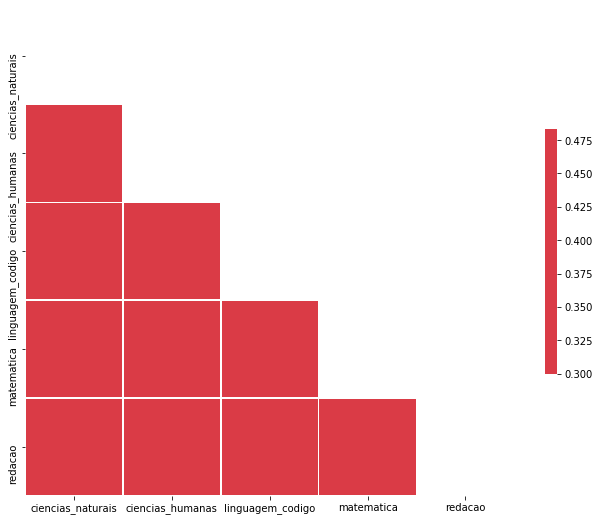

In [9]:
# Gráfico ficou muito confuso

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

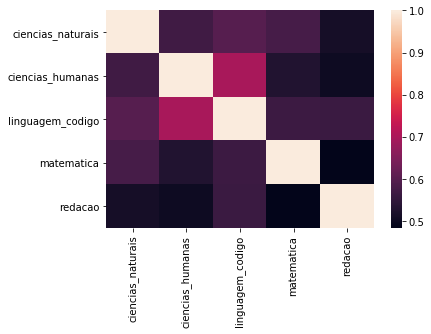

In [10]:
# Não ficou bom
sns.heatmap(corr)

In [11]:
# Pairplot
# kind="reg" - insere uma regressão linear
# Mas demora para carregar!!!!
#sns.pairplot(dados_notas, kind="reg")

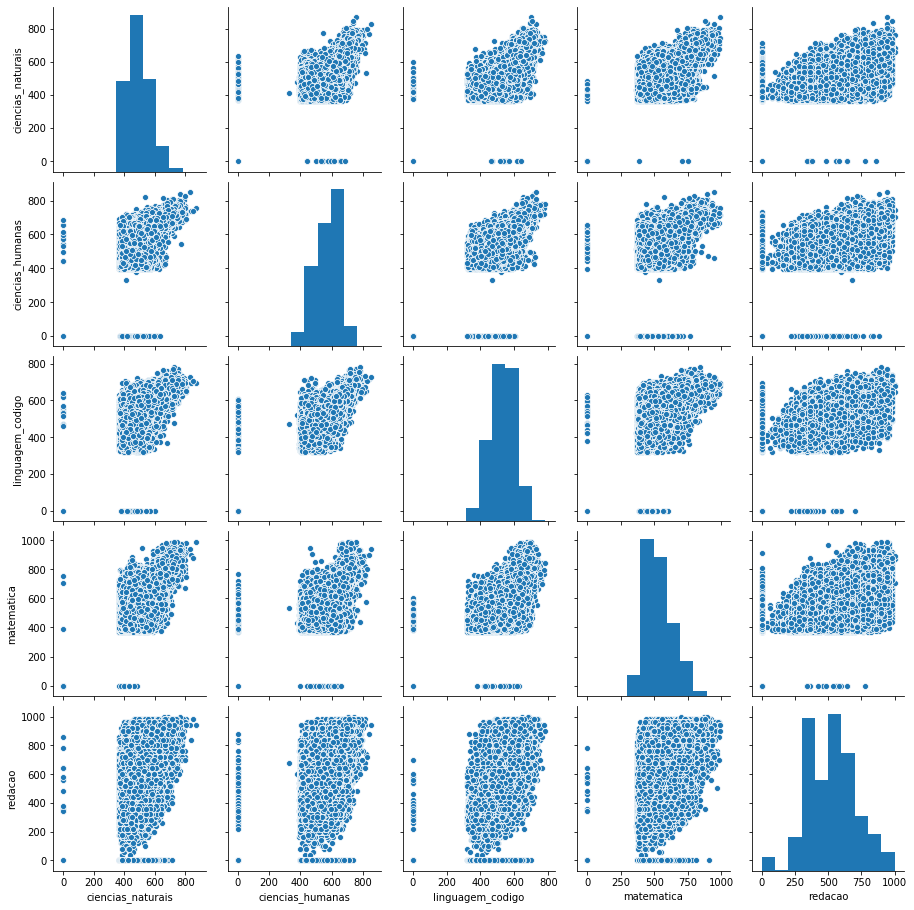

In [12]:
# Usando sem regressão para ser mais rápido
sns.pairplot(dados_notas)

# Aula 5
#### Regressão e Machine Learning

In [13]:
# O que acontece se trabalharmos com os dados sem limpa-los
# Para prever algo, precisa entender um padrão de comportamento
# Sempre separando os dados em teste e treino

In [14]:
# Tentar acertar a nota da Redação, baseada nos outros atributos
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [15]:
# Variáveis preditoras ou independentes
x = dados_notas[["ciencias_naturais", "ciencias_humanas", "matematica", "redacao"]]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [16]:
# O que quero prever - preditiva/predição ou dependentes
y = dados_notas["linguagem_codigo"]
y.head()

1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagem_codigo, dtype: float64

In [17]:
# Separando em treino e teste
# Usando o SKLearn, ver doc
from sklearn.model_selection import train_test_split # Sempre pega uma amostragem randomica dos dados


# Fixando a amostragem randomica, mas é melhor usar o seed do numpy
# porque se esquecer de passar uma função sem o random_state, pode dar problema
np.random.seed(43267)


# Devolve dados de treino e teste de cada variável
# Independentes primeiro, depois as dependentes (SEMPRE)
# Usualmente separa 70% treino e 30% teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y) # random_state = 326784, 


print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [18]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


In [19]:
from sklearn.svm import LinearSVR

# Modelo de regressão
# C - Parâmetro de convergencia, precisa testar valores diferentes para tentar aumentar ele
# max_iter - Número de iterações. Precisa aumentar ele, vai suprir o warning quanto convergir
# Mas isso depende muito da complexidade dos seus dados, pode convergir mais ou não
modelo = LinearSVR()

# Colocando dados de treino no modelo
modelo.fit(x_treino, y_treino)

C:\Users\luisg\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [20]:
# Teste - validação do treino
# Cuidado com o overfit, o modelo precisa ser generalizável
predicoes_notas = modelo.predict(x_teste)
predicoes_notas[:5] # primeiro 5 resultados, o quanto seria o resultado

array([507.82371068, 539.68470532, 507.63259622, 455.35972018,
       567.06769021])

In [21]:
# vendo o resultado e comprando com x_teste
# está nas mesmo ordem que o de cima
y_teste[:5] # primeiro 5 resultados, o quanto foi o resultado de fato

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

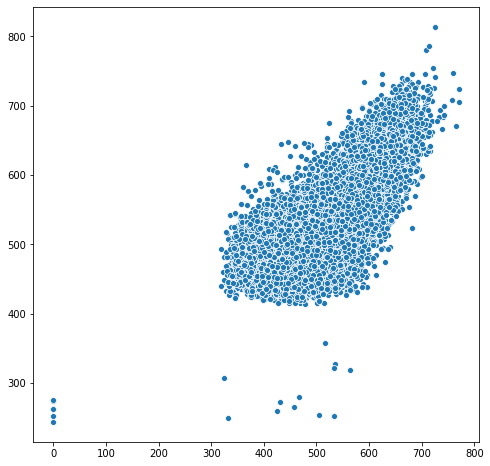

In [22]:
# Plotando para ver a distância/diferença entre x_teste e y_teste
# Por ser um modelo de regressão linear, precisa-se de um gráfico adequado

# values do numpy para os dois ficarem iguais
plt.figure(figsize=(8,8))
# eixo x - nota da pessoa
# eixo y - predição
sns.scatterplot(x=y_teste.values, y=predicoes_notas)
plt.show()

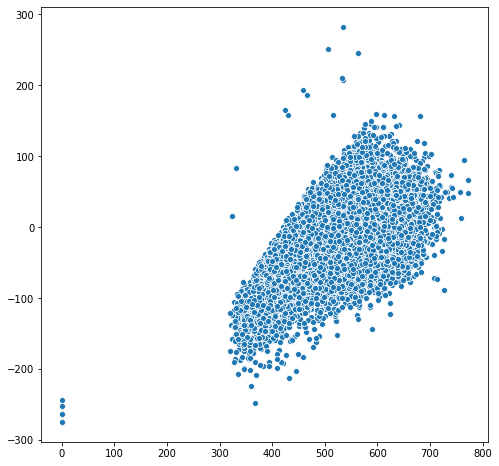

In [23]:
plt.figure(figsize=(8,8))
# eixo x - nota da pessoa
# eixo y - nota da pessoa - predição
sns.scatterplot(x=y_teste.values, y= y_teste.values - predicoes_notas)
plt.show()

# Grafíco apresenta o erro em função das notas, 
# dando notas mais altas para quem já tinha alta
# e cada vez mais notas mais baixas para quem tirou menos
# Assim, no gráfico vemos um vies para os grupos de notas por pessoa
# Seria melhor apresentado num gráfico de valor esperado por erro

In [24]:
# Média para cada aluno
x_teste.mean(axis=1)

41528    474.48
81918    561.45
22786    442.50
17935    487.88
70617    517.42
          ...  
54239    510.27
98861    704.45
105209   462.88
110757   585.02
80515    457.20
Length: 24318, dtype: float64

In [25]:
# Apresentando os erros - distância entre o que foi previsto e o fato
# Alguns muito acima e outros muito abaixo
y_teste - x_teste.mean(axis=1)

41528    -54.28
81918    -15.85
22786     75.60
17935     51.33
70617     19.48
          ...  
54239      8.93
98861    -91.85
105209    48.23
110757   -45.02
80515     58.20
Length: 24318, dtype: float64

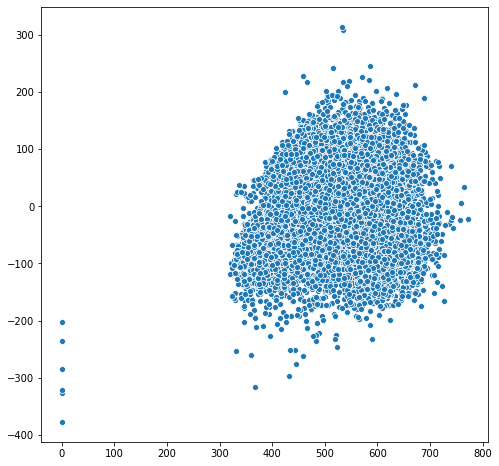

In [26]:
plt.figure(figsize=(8,8))
# eixo x - nota da pessoa
# eixo y - predição, tirando a diferença entre predição e fato
sns.scatterplot(x=y_teste.values, y= y_teste.values - x_teste.mean(axis=1))
plt.show()

Testando em outro modelo para os dados

In [27]:
# Support Vector Machine
from sklearn.svm import SVR
# SVR tira a linearidade ou modelo de regressão não linear
modelo = SVR()
# Colocando dados de treino no modelo
modelo.fit(x_treino, y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

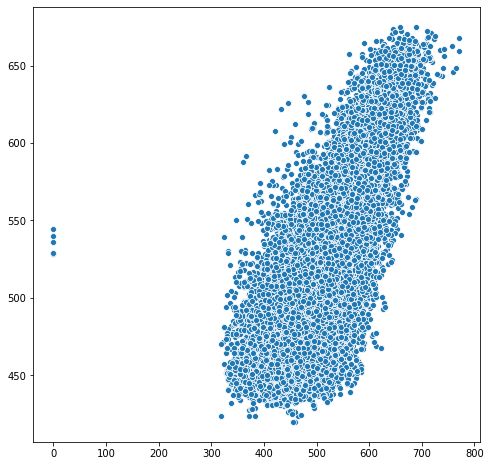

In [28]:
# Teste - validação do treino
predicoes_notas = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste.values, y= predicoes_notas)
plt.show()

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR tira a linearidade ou modelo de regressão não linear
modelo = DecisionTreeRegressor()
# Colocando dados de treino no modelo
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

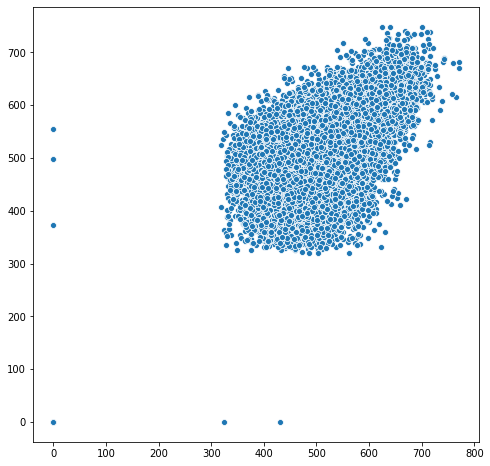

In [30]:
# Teste - validação do treino
predicoes_notas = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste.values, y=predicoes_notas)
plt.show()

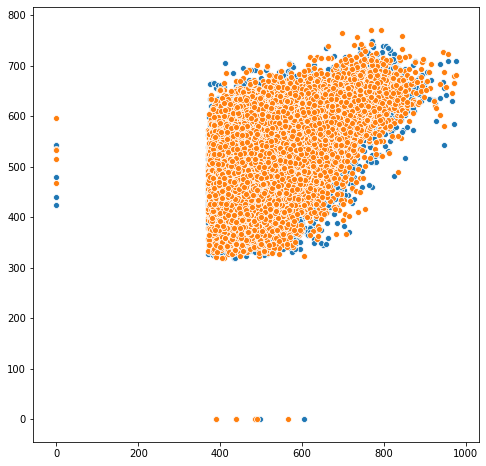

In [31]:
# Plotando as predições e os dados de y_teste de matematica
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste["matematica"].values, y=predicoes_notas)
sns.scatterplot(x=x_teste["matematica"].values, y=y_teste.values)
plt.show()

# Dá para ver que as previções são bem próximas das notas reais

In [32]:
# Médias dos erros das predições
# Médias dos erros quadrados - quanto menor melhor
# Calcula o erro quadrado das predições pelo teste
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_notas)

4133.518822682787

In [33]:
# Gerando um array para pode comparar com a média acima
# para ver se os dados dummies se saem melhor
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)
# Saiu pior os dados dummies, nosso modelo saiu melhor.
# Está errando o erro qaudrado em 5 mil, o nosso é menor.
# Numa escala com muitos dados, esse erro é muito grande.

5193.5388280703755

In [34]:
# Mediana como dummy pode ser melhor (sem os zeros que puxam média para baixo)?
# E se tirarmos os zeros?

In [35]:
# Usando a medianda nos dummies
modelo_dummy = DummyRegressor(strategy="median")
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)
# Ficou pior com a mediana

5216.584281602106